## Query all EPN-TAP services

*(Jan. 2024, updated Feb 2026)*

We show here how to send the same EPN-TAP query to all existing EPN-TAP services. This will retrieve all results from many independent services / institutes, including those unknown to the user.

EPN-TAP services are first identified from the IVOA registry. Then the query is sent to all of them in sequence.

### Grab a list of all EPN-TAP services from the registry

In [1]:
import pyvo as vo
from matplotlib import pyplot as plt
from astropy.table import Table
from astropy.table import vstack
import urllib
from astroquery.utils.tap.core import TapPlus  

In [2]:
query = "SELECT table_name, access_url, ivoid FROM (SELECT ivoid, table_name, table_utype FROM rr.res_table WHERE table_utype LIKE 'ivo://vopdc.obspm/std/epncore%' OR table_utype LIKE 'ivo://ivoa.net/std/epntap#table-2.%' OR table_utype='ivo.//vopdc.obspm/std/epncore#schema-2.0' ) AS epntables NATURAL JOIN rr.capability NATURAL JOIN rr.interface WHERE standard_id = 'ivo://ivoa.net/std/tap' AND intf_role='std'"

In [3]:
registry_url = "http://voparis-rr.obspm.fr/tap"

In [4]:
services = TapPlus(url=registry_url)
job = services.launch_job(query)
r1 = job.get_results()
# lists all published EPN-TAP services:
r1

table_name,access_url,ivoid
object,object,object
hrsc3nd.epn_core,http://dachs.planet.fu-berlin.de/tap,ivo://fu-berlin.planet.hrsc/tap
climso.epn_core,/tap,ivo://ovgso/tap
cpstasm.epn_core,http://dorotka.ufa.cas.cz/tap,ivo://iap/tap
thmsm.epn_core,http://dorotka.ufa.cas.cz/tap,ivo://iap/tap
neocc.epn_core,https://dachs.neo.s2p.esa.int/tap,ivo://neocc.esa/tap
h2tecmaps.epn_core,http://pithia.cbk.waw.pl/tap,ivo://src.pas/tap
ionosondes.epn_core,http://pithia.cbk.waw.pl/tap,ivo://src.pas/tap
iriwarsaw.epn_core,http://pithia.cbk.waw.pl/tap,ivo://src.pas/tap
nqmaps.epn_core,http://pithia.cbk.waw.pl/tap,ivo://src.pas/tap


In [5]:
# accessing elt: 
print(r1['table_name'])
print(r1['table_name'][0])
print(r1['access_url'][0])

             table_name            
-----------------------------------
                   hrsc3nd.epn_core
                    climso.epn_core
                   cpstasm.epn_core
                     thmsm.epn_core
                     neocc.epn_core
                 h2tecmaps.epn_core
                ionosondes.epn_core
                 iriwarsaw.epn_core
                    nqmaps.epn_core
pl610_dynamic_spectra_casa.epn_core
                                ...
            titan_profiles.epn_core
               tnosarecool.epn_core
                  usgs_wms.epn_core
             venus_craters.epn_core
           vims_satellites.epn_core
                   vir_ros.epn_core
                    voccdb.epn_core
               vros_geocor.epn_core
                      vvex.epn_core
                   vvex_db.epn_core
Length = 109 rows
hrsc3nd.epn_core
http://dachs.planet.fu-berlin.de/tap


### Sending a simple query to all services

Here we're looking for values of an optional parameter. This will just print the table name if the parameter is not provided, or the number of values otherwise.

**The query is a bit long to execute, due to the large number of EPN-TAP services published in the registry (in February 2026)**

In [6]:
for ii in range((r1['table_name']).shape[0]):
	Stable_name = r1['table_name'][ii]
	Service_url = r1['access_url'][ii]
	query2 = "SELECT distinct spatial_origin FROM " + Stable_name
	# remove some incomplete records
	if r1['access_url'][ii] == '/tap': 
		continue
	answers = TapPlus(url=Service_url)
	# remove one uncorrect entry
	if r1['access_url'][ii] == 'http://vo-node1.iaps.inaf.it/tap': 
		continue
	# skip the largest server
	if r1['access_url'][ii] == 'https://vo-pds-ppi.igpp.ucla.edu/tap': 
		continue
	try:
		job2 = answers.launch_job(query2)
		r2 = job2.get_results()
		Stable_name, r2[0][0]
	except:
		print(Stable_name) # command required here


hrsc3nd.epn_core
cpstasm.epn_core
thmsm.epn_core
neocc.epn_core
h2tecmaps.epn_core
ionosondes.epn_core
iriwarsaw.epn_core
nqmaps.epn_core
pl610_dynamic_spectra_casa.epn_core
pl610_dynamic_spectra_cyga.epn_core
pl610_dynamic_spectra_jupiter.epn_core
pl610_dynamic_spectra_sun.epn_core
pl610_dynamic_spectra_taua.epn_core
pl610_dynamic_spectra_vira.epn_core
jasmin.epn_core
mdisc.epn_core
cassini_jupiter.epn_core
cassini_rpws.epn_core
expres.epn_core
juno_waves.epn_core
lofar4sw_proto.epn_core
maser_services.epn_core
spase_vespa.epn_core
stereo_waves.epn_core
tfcat.epn_core
voyager_pra.epn_core
wind_waves.epn_core
parsec.epn_core
nda.epn_core
nenusun.epn_core
nrh.epn_core
orfees.epn_core
solar_nenufar_ml.epn_core
sbnaf.epn_core
mars_dust.epn_core
mcd.epn_core
vcd.epn_core
sshade_bandlist.epn_core
sshade_spectra.epn_core
bass2000.epn_core
hfc1t3.epn_core
artecs.epn_core
ndcs.epn_core
mp3c_best_epn.epn_core
neorocks_obs.epn_core
neorocks_phys.epn_core
climso.epn_core
amdadb.epn_core
illu67p.e

### Sending a more realistic query to all services

In [7]:
# first define a result table 
# actually doesn't work - all grouped in first column later
d = {
    'service_title': [''],
    'granule_uid': [''],
    'time_min': [0.],
    'solar_longitude_min': [0.],
    'solar_longitude_max': [0.]
}
import pandas as pd
df = pd.DataFrame()

Then sends a more realistic query to all services and concatenate results - we're asking for any data during a specific season on Mars, whatever the year

In [8]:
for ii in range((r1['table_name']).shape[0]):
	Stable_name = r1['table_name'][ii]
	Service_url = r1['access_url'][ii]
	query2 = "SELECT * FROM " + Stable_name + " WHERE target_name = 'Mars' and solar_longitude_min >= 30 and solar_longitude_max <= 40"
    # remove some incomplete records
	if r1['access_url'][ii] == '/tap': 
		continue
	answers = TapPlus(url=Service_url)
	# remove one uncorrect entry
	if r1['access_url'][ii] == 'http://vo-node1.iaps.inaf.it/tap': 
		continue
	# skip the largest server
	if r1['access_url'][ii] == 'https://vo-pds-ppi.igpp.ucla.edu/tap': 
		continue
	try:
		job2 = answers.launch_job(query2)
		r2 = job2.get_results()
		print(Stable_name , r2['service_title'].shape[0] )
	# cumulative results
		df = vstack([df, r2['service_title','granule_uid','time_min', 'solar_longitude_min','solar_longitude_max']], join_type='outer')
	except:
		print(Stable_name ) # a command is required

hrsc3nd.epn_core 169
cpstasm.epn_core
thmsm.epn_core
neocc.epn_core
h2tecmaps.epn_core
ionosondes.epn_core
iriwarsaw.epn_core
nqmaps.epn_core
pl610_dynamic_spectra_casa.epn_core
pl610_dynamic_spectra_cyga.epn_core
pl610_dynamic_spectra_jupiter.epn_core
pl610_dynamic_spectra_sun.epn_core
pl610_dynamic_spectra_taua.epn_core
pl610_dynamic_spectra_vira.epn_core
jasmin.epn_core
mdisc.epn_core
chrotel.epn_core
gris.epn_core
lars.epn_core
cassini_jupiter.epn_core
cassini_rpws.epn_core
expres.epn_core
juno_waves.epn_core
lofar4sw_proto.epn_core
maser_services.epn_core
spase_vespa.epn_core
stereo_waves.epn_core
tfcat.epn_core
voyager_pra.epn_core
wind_waves.epn_core
parsec.epn_core
nda.epn_core
nenusun.epn_core
nrh.epn_core
orfees.epn_core
solar_nenufar_ml.epn_core
sbnaf.epn_core
mars_dust.epn_core
mcd.epn_core 0
vcd.epn_core
sshade_bandlist.epn_core


sshade_spectra.epn_core
bass2000.epn_core
hfc1ar.epn_core
hfc1ar_majtrim.epn_core
hfc1t3.epn_core
artecs.epn_core
ndcs.epn_core
mp3c_best_epn.epn_core
neorocks_obs.epn_core
neorocks_phys.epn_core
climso.epn_core
gem_mars.epn_core 2000
nomad.epn_core 780
soir.epn_core 0
amdadb.epn_core
illu67p.epn_core
transplanet.epn_core
rob_spoca_ch.epn_core
uset_sunspot_drawing.epn_core
uset_sunspot_group.epn_core
epn_core
mp3c_best_epn.epn_core
pvol.epn_core
currents_epn.epn_core
eit_syn.epn_core
gaia_dem.epn_core
omega_cubes.epn_core
omega_maps.epn_core
synopticmaps.epn_core
mpc.epn_core
spicam.epn_core 118
apis.epn_core


basecom.epn_core
bdip.epn_core
crism_speclib.epn_core
dynastvo.epn_core
exoplanet.epn_core
gmap.epn_core
hst_planeto.epn_core
iks.epn_core
lunar_craters.epn_core
m4ast.epn_core
mars_craters.epn_core
mars_craters_lagain.epn_core
mercury_craters.epn_core
meteor_showers.epn_core 2
moonsprop.epn_core
pds_speclib.epn_core
planets.epn_core
spectro_asteroids.epn_core
spectro_m_ast.epn_core
spectro_planets.epn_core
spectro_stars.epn_core
spectro_trojans.epn_core
terrestrial_impact_craters.epn_core
titan_profiles.epn_core
tnosarecool.epn_core
usgs_wms.epn_core
venus_craters.epn_core
vims_satellites.epn_core
vir_ros.epn_core 0


voccdb.epn_core
vros_geocor.epn_core 0


vvex.epn_core 0
vvex_db.epn_core 0


In [9]:
df

col0,service_title,granule_uid,time_min,solar_longitude_min,solar_longitude_max
,,,d,deg,deg
float64[0],object,object,float64,float64,float64
,hrsc3nd,h0376_0000.nd3.09,2453133.87744213,30.15999984741211,30.15999984741211
,hrsc3nd,h0380_0000.nd3.12,2453135.06644676,30.700000762939453,30.700000762939453
,hrsc3nd,h0380_0001.nd3.11,2453135.07356481,30.700000762939453,30.700000762939453
,hrsc3nd,h0383_0000.nd3.09,2453135.95583333,31.110000610351562,31.110000610351562
,hrsc3nd,h0389_0000.nd3.11,2453137.67203704,31.889999389648438,31.889999389648438
,hrsc3nd,h0394_0000.nd3.07,2453139.07164352,32.529998779296875,32.529998779296875
,hrsc3nd,h0394_0009.nd3.07,2453139.07917824,32.540000915527344,32.540000915527344
,hrsc3nd,h0397_0000.nd3.08,2453139.91438657,32.91999816894531,32.91999816894531


Then plot cumulative results

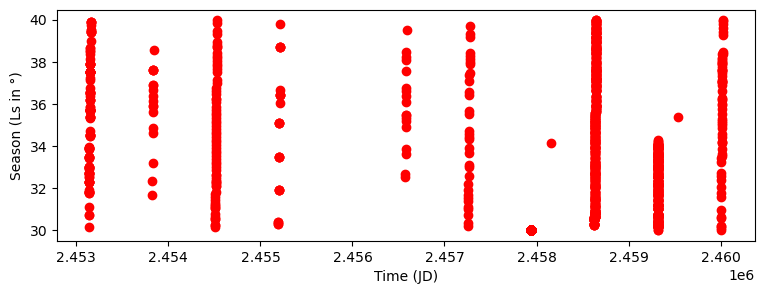

In [10]:
plt.figure(figsize=(9, 3))
plt.xlabel('Time (JD)')
plt.ylabel('Season (Ls in °)')
p=plt.plot(df['time_min'], df['solar_longitude_max'], 'ro')
p3= plt.show()
